![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

**The FinanceToolkit** is an open-source toolkit in which all relevant financial ratios (50+), indicators and performance measurements are written down in the most simplistic way allowing for complete transparency of the calculation method. This allows you to not have to rely on metrics from other providers and, given a financial statement, allow for efficient manual calculations. This leads to one uniform method of calculation being applied that is available and understood by everyone.

## Table of Contents

1. [Installation](#installation)
2. [The Toolkit Module](#the-toolkit-module)
3. [The Ratios Module](#the-ratios-module)
4. [The Models Module](#the-models-module)
5. [Calling Functions Directly](#calling-functions-directly)

# Installation
To install the FinanceToolkit it simply requires the following:

```
pip install financetoolkit -U
```

From within Python use:

```python
from financetoolkit import Toolkit
```
 
To be able to get started, you need to obtain an API Key from FinancialModelingPrep. This is used to gain access to 30+ years of financial statement both annually and quarterly. Note that the Free plan is limited to 250 requests each day, 5 years of data and only features companies listed on US exchanges.

___ 

<b><div align="center">Obtain an API Key from FinancialModelingPrep <a href="https://site.financialmodelingprep.com/developer/docs/pricing/jeroen/">here</a>.</div></b>
___

Through the link you are able to subscribe for the free plan and also premium plans at a *15% discount*. This is an affiliate link and thus supports the project at the same time. I have chosen FinancialModelingPrep as a source as I find it to be the most transparent, reliable and at an affordable price. When you notice that data is inaccurate or have any other issue related to the data, note that I simply provide the means to access this data and I am not responsible for the accuracy of the data itself. For this, use [their contact form](https://site.financialmodelingprep.com/contact) or provide the data yourself. 

In [1]:
import pandas as pd
import numpy as np

from financetoolkit import Toolkit

API_KEY = "FMP_KEY"

# The Toolkit Module

Initializing only is required once. This is the case for any function so once you have obtained a balance sheet statement, it will be stored accordingly which means that requests to FinancialModelingPrep, the source used in these examples, are kept to a minimum. Note that in this example annual data is used but by adding `quarterly=True` to the Toolkit initialization, quarterly data can also be collected. Note that this requires a Premium subscription from FMP. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Toolkit-Module) to find all the available functionality.

In [2]:
# Initialize the Toolkit with company tickers
companies = Toolkit(
    ["AAPL", "MSFT", "GOOGL", "AMZN"], api_key=API_KEY, start_date="2000-01-01"
)

Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2023-07-31  196.185074  133.679993  132.720001  335.920013  196.449997   
2023-08-01  195.346207  131.690002  131.550003  336.339996  195.610001   
2023-08-02  192.320297  128.210007  128.380005  327.500000  192.580002   
2023-08-03  190.912201  128.910004  128.449997  326.660004  191.169998   
2023-08-04  181.744583  139.570007  128.110001  327.779999  181.990005   
2023-08-07  178.608810  142.220001  131.529999  330.109985  178.850006   
2023-08-08  179.557526  139.940002  131.399994  326.049988  179.800003   
2023-08-09  177.949707  137.850006  129.660004  322.230011  178.190002   
2023-08-10  177.729996  138.559998  129.690002  322.929993  177.970001   
2023-08-11  177.789993  138.410004  129.559998  321.010010  177.789993   

                                               Dividends       ...  \
                  AMZN       GOOGL        MSFT      AAPL AMZN  ...   
Date                                                           ...   
2023-07-31  133.679993  132.720001  335.920013      0.00    0  ...   
2023-08-01  131.690002  131.550003  336.339996      0.00    0  ...   
2023-08-02  128.210007  128.380005  327.500000      0.00    0  ...   
2023-08-03  128.910004  128.449997  326.660004      0.00    0  ...   
2023-08-04  139.570007  128.110001  327.779999      0.00    0  ...   
2023-08-07  142.220001  131.529999  330.109985      0.00    0  ...   
2023-08-08  139.940002  131.399994  326.049988      0.00    0  ...   
2023-08-09  137.850006  129.660004  322.230011      0.00    0  ...   
2023-08-10  138.559998  129.690002  322.929993      0.00    0  ...   
2023-08-11  138.410004  129.559998  321.010010      0.24    0  ...   

                  Open                Return                                \
                 GOOGL        MSFT      AAPL      AMZN     GOOGL      MSFT   
Date                                                                         
2023-07-31  132.729996  336.920013  0.003166  0.011119  0.001056 -0.007241   
2023-08-01  130.779999  335.190002 -0.004276 -0.014886 -0.008816  0.001250   
2023-08-02  129.449997  333.630005 -0.015490 -0.026426 -0.024097 -0.026283   
2023-08-03  127.970001  326.000000 -0.007322  0.005460  0.000545 -0.002565   
2023-08-04  129.279999  331.880005 -0.048020  0.082693 -0.002647  0.003429   
2023-08-07  129.160004  328.369995 -0.017254  0.018987  0.026696  0.007108   
2023-08-08  130.619995  326.959991  0.005312 -0.016031 -0.000988 -0.012299   
2023-08-09  131.660004  326.470001 -0.008954 -0.014935 -0.013242 -0.011716   
2023-08-10  131.320007  326.019989 -0.001235  0.005150  0.000231  0.002172   
2023-08-11  128.660004  320.260010  0.000338 -0.001083 -0.001002 -0.005946   

               Volume                                   
                 AAPL       AMZN       GOOGL      MSFT  
Date                                                    
2023-07-31   38824100   41901500  28055500.0  25446000  
2023-08-01   35175100   42098500  23166800.0  18311900  
2023-08-02   50389300   51027600  26273300.0  27761300  
2023-08-03   61235200   88585200  20089500.0  18253700  
2023-08-04  115799700  152938700  26130000.0  23727700  
2023-08-07   97576100   71213100  22746300.0  17741500  
2023-08-08   67823000   51710500  23535200.0  22327600  
2023-08-09   60378500   50017300  24912900.0  22373300  
2023-08-10   54686900   58928400  20857800.0  20113700  
2023-08-11   51988100   42832100  19569200.0  24342600  

[10 rows x 32 columns]

Adj Close                                           Close              \
            AAPL        AMZN       GOOGL        MSFT        AAPL        AMZN   
Date                                                                           
1999    0.779169    3.806250         NaN   36.340607    0.917969    3.806250   
2000    0.225462    0.778125         NaN   13.501278    0.265625    0.778125   
2001    0.331940    0.541000         NaN   20.621553    0.391071    0.541000   
2002    0.217201    0.944500         NaN   16.092594    0.255893    0.944500   
2003    0.323907    2.631000         NaN   17.189537    0.381607    2.631000   
2004    0.976116    2.214500    4.824575   18.758617    1.150000    2.214500   
2005    2.179285    2.357500   10.381882   18.582617    2.567500    2.357500   
2006    2.571854    1.973000   11.523524   21.525984    3.030000    1.973000   
2007    6.004628    4.632000   17.304304   26.012611    7.074286    4.632000   
2008    2.587313    2.564000    7.698949   14.466764    3.048214    2.564000   
2009    6.388103    6.726000   15.515015   23.214405    7.526071    6.726000   
2010    9.778139    9.000000   14.864114   21.699745   11.520000    9.000000   
2011   12.277236    8.655000   16.163664   20.719858   14.464286    8.655000   
2012   16.275557   12.543500   17.702202   21.921373   19.006071   12.543500   
2013   17.588902   19.939501   28.045795   31.632109   20.036428   19.939501   
2014   24.733969   15.517500   26.533001   40.351383   27.594999   15.517500   
2015   23.988556   33.794498   38.900501   49.507847   26.315001   33.794498   
2016   26.982430   37.493500   39.622501   56.972504   28.955000   37.493500   
2017   40.059284   58.473499   52.669998   80.177750   42.307499   58.473499   
2018   37.900002   75.098503   52.248001   96.850967   39.435001   75.098503   
2019   71.615021   92.391998   66.969498  152.596527   73.412498   92.391998   
2020  130.559006  162.846497   87.632004  217.502045  132.690002  162.846497   
2021  175.795349  166.716995  144.852005  331.640472  177.570007  166.716995   
2022  129.378006   84.000000   88.230003  238.699020  129.929993   84.000000   
2023  177.789993  138.410004  129.559998  321.010010  177.789993  138.410004   

                             Dividends       ...        Open              \
           GOOGL        MSFT      AAPL AMZN  ...       GOOGL        MSFT   
Date                                         ...                           
1999         NaN   58.375000  0.000000    0  ...         NaN   58.750000   
2000         NaN   21.687500  0.000000    0  ...         NaN   21.968750   
2001         NaN   33.125000  0.000000    0  ...         NaN   33.919998   
2002         NaN   25.850000  0.000000    0  ...         NaN   26.370001   
2003         NaN   27.370001  0.000000    0  ...         NaN   27.420000   
2004    4.824575   26.719999  0.000000    0  ...    4.985736   26.750000   
2005   10.381882   26.150000  0.000000    0  ...   10.442192   26.150000   
2006   11.523524   29.860001  0.000000    0  ...   11.564064   29.860001   
2007   17.304304   35.599998  0.000000    0  ...   17.481731   35.900002   
2008    7.698949   19.440001  0.000000    0  ...    7.612613   19.309999   
2009   15.515015   30.480000  0.000000    0  ...   15.634384   30.980000   
2010   14.864114   27.910000  0.000000    0  ...   14.933433   27.799999   
2011   16.163664   25.959999  0.000000    0  ...   16.066566   26.000000   
2012   17.702202   26.709999  0.189286    0  ...   17.517517   26.590000   
2013   28.045795   37.410000  0.421430    0  ...   27.833834   37.400002   
2014   26.533001   46.450001  0.461429    0  ...   26.886999   46.730000   
2015   38.900501   55.480000  0.507500    0  ...   39.390999   56.040001   
2016   39.622501   62.139999  0.557500    0  ...   40.160500   62.959999   
2017   52.669998   85.540001  0.615000    0  ...   52.774502   85.629997   
2018   52.248001  101.570000  0.705000    0  ...   52.891499  101.290001   
2019   66.969498  

<Axes: xlabel='Date'>

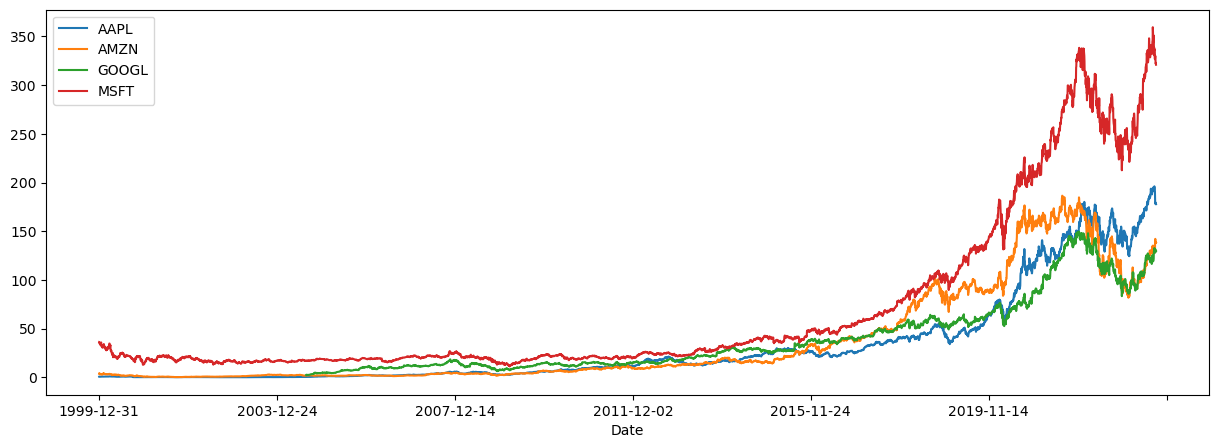

In [3]:
# Obtain daily historical data from each company
display(companies.get_historical_data().tail(10))

# Obtain yearly historical data from each company
display(companies.get_historical_data(period="yearly"))

# Plot the Adjusted Close Prices
companies.get_historical_data()["Adj Close"].plot(figsize=(15, 5))

In [4]:
# Obtain the balance sheets from each company
companies.get_balance_sheet_statement()

date                                          2000          2001  \
AAPL Cash and Cash Equivalents        1.191000e+09  2.310000e+09   
     Short Term Investments           2.836000e+09  2.026000e+09   
     Cash and Short Term Investments  4.027000e+09  4.336000e+09   
     Accounts Receivable              9.530000e+08  4.660000e+08   
     Inventory                        3.300000e+07  1.100000e+07   
...                                            ...           ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00   
     Total Liabilities and Equity     5.215000e+10  5.925700e+10   
     Total Investments                0.000000e+00  0.000000e+00   
     Total Debt                       0.000000e+00  0.000000e+00   
     Net Debt                        -4.846000e+09 -3.922000e+09   

date                                          2002          2003  \
AAPL Cash and Cash Equivalents        2.252000e+09  3.396000e+09   
     Short Term Investments           2.085000e+09  1.170000e+09   
     Cash and Short Term Investments  4.337000e+09  4.566000e+09   
     Accounts Receivable              5.650000e+08  9.500000e+08   
     Inventory                        4.500000e+07  5.600000e+07   
...                                            ...           ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00   
     Total Liabilities and Equity     6.764600e+10  7.957100e+10   
     Total Investments                0.000000e+00  0.000000e+00   
     Total Debt                       0.000000e+00  0.000000e+00   
     Net Debt                        -3.016000e+09 -6.438000e+09   

date                                          2004          2005  \
AAPL Cash and Cash Equivalents        2.969000e+09  3.491000e+09   
     Short Term Investments           2.495000e+09  4.770000e+09   
     Cash and Short Term Investments  5.464000e+09  8.261000e+09   
     Accounts Receivable              1.050000e+09  1.312000e+09   
     Inventory                        1.010000e+08  1.650000e+08   
...                                            ...           ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00   
     Total Liabilities and Equity     9.238900e+10  7.081500e+10   
     Total Investments                0.000000e+00  0.000000e+00   
     Total Debt                       0.000000e+00  0.000000e+00   
     Net Debt                        -1.598200e+10 -4.851000e+09   

date                                          2006          2007  \
AAPL Cash and Cash Equivalents        6.392000e+09  9.352000e+09   
     Short Term Investments           3.718000e+09  6.034000e+09   
     Cash and Short Term Investments  1.011000e+10  1.538600e+10   
     Accounts Receivable              2.845000e+09  4.029000e+09   
     Inventory                        2.700000e+08  3.460000e+08   
...                                            ...           ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00   
     Total Liabilities and Equity     6.959700e+10  6.317100e+10   
     Total Investments                0.000000e+00  0.000000e+00   
     Total Debt                       0.000000e+00  0.000000e+00   
     Net Debt                        -6.714000e+09 -6.111000e+09   

date                                          2008          2009  ...  \
AAPL Cash and Cash Equivalents        1.187500e+10  5.263000e+09  ...   
     Short Term Investments           1.261500e+10  1.820100e+10  ...   
     Cash and Short Term Investments  2.449000e+10  2.346400e+10  ...   
     Accounts Receivable              2.422000e+09  3.361000e+09  ...   
     Inventory                        5.090000e+08  4.550000e+08  ...   
...                                            ...           ...  ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00  ...   
     Total Liabilities and Equity     7.279300e+10  7.788800e+10  ...   
     Total Investments                1.991100e+10  3.030400e+10  ...   
  

In [5]:
# Obtain the income statements from each company
companies.get_income_statement()

date                                            2000          2001  \
AAPL Revenue                            7.983000e+09  5.363000e+09   
     Cost of Goods Sold                 5.817000e+09  4.128000e+09   
     Gross Profit                       2.166000e+09  1.235000e+09   
     Gross Profit Ratio                 2.713000e-01  2.303000e-01   
     Research and Development Expenses  3.800000e+08  4.410000e+08   
...                                              ...           ...   
MSFT Net Income Ratio                   4.104000e-01  2.904000e-01   
     EPS                                9.050000e-01  6.900000e-01   
     EPS Diluted                        8.500000e-01  6.600000e-01   
     Weighted Average Shares            1.037800e+10  1.068200e+10   
     Weighted Average Shares Diluted    1.107200e+10  1.114800e+10   

date                                            2002          2003  \
AAPL Revenue                            5.742000e+09  6.207000e+09   
     Cost of Goods Sold                 4.139000e+09  4.499000e+09   
     Gross Profit                       1.603000e+09  1.708000e+09   
     Gross Profit Ratio                 2.792000e-01  2.752000e-01   
     Research and Development Expenses  4.470000e+08  4.710000e+08   
...                                              ...           ...   
MSFT Net Income Ratio                   2.760000e-01  3.105000e-01   
     EPS                                7.250000e-01  9.300000e-01   
     EPS Diluted                        7.050000e-01  9.200000e-01   
     Weighted Average Shares            1.081200e+10  1.072300e+10   
     Weighted Average Shares Diluted    1.110600e+10  1.088200e+10   

date                                            2004          2005  \
AAPL Revenue                            8.279000e+09  1.393100e+10   
     Cost of Goods Sold                 6.020000e+09  9.888000e+09   
     Gross Profit                       2.259000e+09  4.043000e+09   
     Gross Profit Ratio                 2.729000e-01  2.902000e-01   
     Research and Development Expenses  4.890000e+08  5.340000e+08   
...                                              ...           ...   
MSFT Net Income Ratio                   2.217000e-01  3.080000e-01   
     EPS                                7.600000e-01  1.130000e+00   
     EPS Diluted                        7.500000e-01  1.120000e+00   
     Weighted Average Shares            1.080300e+10  1.083900e+10   
     Weighted Average Shares Diluted    1.089400e+10  1.090600e+10   

date                                            2006          2007  \
AAPL Revenue                            1.931500e+10  2.400600e+10   
     Cost of Goods Sold                 1.371700e+10  1.585200e+10   
     Gross Profit                       5.598000e+09  8.154000e+09   
     Gross Profit Ratio                 2.898000e-01  3.397000e-01   
     Research and Development Expenses  7.120000e+08  7.820000e+08   
...                                              ...           ...   
MSFT Net Income Ratio                   2.845000e-01  2.751000e-01   
     EPS                                1.210000e+00  1.440000e+00   
     EPS Diluted                        1.200000e+00  1.420000e+00   
     Weighted Average Shares            1.043800e+10  9.742000e+09   
     Weighted Average Shares Diluted    1.053100e+10  9.886000e+09   

date                                            2008          2009  ...  \
AAPL Revenue                            3.247900e+10  3.653700e+10  ...   
     Cost of Goods Sold                 2.133400e+10  2.339700e+10  ...   
     Gross Profit                       1.114500e+10  1.314000e+10  ...   
     Gross Profit Ratio                 3.431000e-01  3.596000e-01  ...   
     Research and Development Expenses  1.109000e+09  1.333000e+09  ...   
...                                              ...           ...  ...   
MSFT Net Income Ratio                   2.926000e-01  2.493000e-01  ...   
     EPS                            

In [6]:
# Obtain the cash flow statements from each company
companies.get_cash_flow_statement()

date                                        2000          2001          2002  \
AAPL Net Income                     7.860000e+08 -3.700000e+07  6.500000e+07   
     Depreciation and Amortization  8.400000e+07  1.020000e+08  1.180000e+08   
     Deferred Income Tax            1.630000e+08 -3.600000e+07 -3.400000e+07   
     Stock Based Compensation       0.000000e+00  0.000000e+00  0.000000e+00   
     Change in Working Capital      1.570000e+08  2.110000e+08 -1.030000e+08   
...                                          ...           ...           ...   
MSFT Cash End of Period             4.846000e+09  3.922000e+09  3.016000e+09   
     Cash Beginning of Period       4.975000e+09  4.846000e+09  3.922000e+09   
     Operating Cash Flow            1.396100e+10  1.342200e+10  1.450900e+10   
     Capital Expenditure           -8.790000e+08 -1.103000e+09 -7.700000e+08   
     Free Cash Flow                 1.308200e+10  1.231900e+10  1.373900e+10   

date                                        2003          2004          2005  \
AAPL Net Income                     6.800000e+07  2.760000e+08  1.335000e+09   
     Depreciation and Amortization  1.130000e+08  1.500000e+08  1.790000e+08   
     Deferred Income Tax           -1.100000e+07  2.000000e+07  5.050000e+08   
     Stock Based Compensation       1.600000e+07  3.300000e+07  4.200000e+07   
     Change in Working Capital      1.260000e+08  4.480000e+08  4.650000e+08   
...                                          ...           ...           ...   
MSFT Cash End of Period             6.438000e+09  1.598200e+10  4.851000e+09   
     Cash Beginning of Period       3.016000e+09  6.438000e+09  1.430400e+10   
     Operating Cash Flow            1.579700e+10  1.462600e+10  1.660500e+10   
     Capital Expenditure           -8.910000e+08 -1.109000e+09 -8.120000e+08   
     Free Cash Flow                 1.490600e+10  1.351700e+10  1.579300e+10   

date                                        2006          2007          2008  \
AAPL Net Income                     1.989000e+09  3.496000e+09  4.834000e+09   
     Depreciation and Amortization  2.250000e+08  3.170000e+08  4.730000e+08   
     Deferred Income Tax            5.300000e+07  7.800000e+07 -3.680000e+08   
     Stock Based Compensation       1.630000e+08  2.420000e+08  5.160000e+08   
     Change in Working Capital     -2.210000e+08  1.325000e+09  4.119000e+09   
...                                          ...           ...           ...   
MSFT Cash End of Period             6.714000e+09  6.111000e+09  1.033900e+10   
     Cash Beginning of Period       4.851000e+09  6.714000e+09  6.111000e+09   
     Operating Cash Flow            1.440400e+10  1.779600e+10  2.161200e+10   
     Capital Expenditure           -1.578000e+09 -2.264000e+09 -3.182000e+09   
     Free Cash Flow                 1.282600e+10  1.553200e+10  1.843000e+10   

date                                        2009  ...          2014  \
AAPL Net Income                     5.704000e+09  ...  3.951000e+10   
     Depreciation and Amortization  7.030000e+08  ...  7.946000e+09   
     Deferred Income Tax           -5.190000e+08  ...  2.347000e+09   
     Stock Based Compensation       7.100000e+08  ...  2.863000e+09   
     Change in Working Capital      3.535000e+09  ...  7.047000e+09   
...                                          ...  ...           ...   
MSFT Cash End of Period             6.076000e+09  ...  8.669000e+09   
     Cash Beginning of Period       1.033900e+10  ...  3.804000e+09   
     Operating Cash Flow            1.903700e+10  ...  3.223100e+10   
     Capital Expenditure           -3.119000e+09  ... -5.485000e+09   
     Free Cash Flow                 1.591800e+10  ...  2.674600e+10   

date                                        2015          2016          2017  \
AAPL Net Income                     5.339400e+10  4.568700e+10  4.835100e+10   
     Depreciation and Amortization  1.125700e+10  1.050500e+10  1.015700e+10   
     Deferred Income Tax

With this structure, it is easy to select and plot specific companies, financial statement items and/or years. See some examples below.

date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Cash and Cash Equivalents,8.224350e+08,540282000.0,7.382540e+08,1.102273e+09,1.302600e+09,1.013000e+09,1.022000e+09,2.539000e+09,2.769000e+09,3.444000e+09,...,1.455700e+10,1.589000e+10,1.933400e+10,2.052200e+10,3.175000e+10,3.609200e+10,4.212200e+10,3.622000e+10,5.388800e+10,NaN
Short Term Investments,2.780870e+08,456303000.0,5.627150e+08,2.925500e+08,4.765990e+08,9.870000e+08,9.970000e+08,5.730000e+08,9.580000e+08,2.922000e+09,...,2.859000e+09,3.918000e+09,6.647000e+09,1.046400e+10,9.500000e+09,1.892900e+10,4.227400e+10,5.982900e+10,1.613800e+10,NaN
Cash and Short Term Investments,1.100522e+09,996585000.0,1.300969e+09,1.394823e+09,1.779199e+09,2.000000e+09,2.019000e+09,3.112000e+09,3.727000e+09,6.366000e+09,...,1.741600e+10,1.980800e+10,2.598100e+10,3.098600e+10,4.125000e+10,5.502100e+10,8.439600e+10,9.604900e+10,7.002600e+10,NaN
Accounts Receivable,0.000000e+00,0.0,1.122820e+08,1.320690e+08,1.991000e+08,2.740000e+08,3.990000e+08,7.050000e+08,8.270000e+08,9.880000e+08,...,5.612000e+09,6.423000e+09,8.339000e+09,1.316400e+10,1.667700e+10,2.081600e+10,2.454200e+10,3.289100e+10,4.236000e+10,NaN
Inventory,1.745630e+08,143722000.0,2.024250e+08,2.939170e+08,4.797090e+08,5.660000e+08,8.770000e+08,1.200000e+09,1.399000e+09,2.171000e+09,...,8.299000e+09,1.024300e+10,1.146100e+10,1.604700e+10,1.717400e+10,2.049700e+10,2.379500e+10,3.264000e+10,3.440500e+10,NaN


date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,9.530000e+08,4.660000e+08,5.650000e+08,9.500000e+08,1.050000e+09,1.312000e+09,2.845000e+09,4.029000e+09,2.422000e+09,3.361000e+09,...,2.721900e+10,3.034300e+10,2.929900e+10,3.567300e+10,4.899500e+10,4.580400e+10,3.744500e+10,5.150600e+10,6.093200e+10,NaN
AMZN,0.000000e+00,0.000000e+00,1.122820e+08,1.320690e+08,1.991000e+08,2.740000e+08,3.990000e+08,7.050000e+08,8.270000e+08,9.880000e+08,...,5.612000e+09,6.423000e+09,8.339000e+09,1.316400e+10,1.667700e+10,2.081600e+10,2.454200e+10,3.289100e+10,4.236000e+10,NaN
GOOGL,0.000000e+00,NaN,6.199400e+07,1.546900e+08,3.823450e+08,6.879760e+08,1.322340e+09,2.307774e+09,2.642192e+09,3.201715e+09,...,1.155600e+10,1.390900e+10,1.423200e+10,1.870500e+10,2.119300e+10,2.749200e+10,3.138400e+10,4.027000e+10,4.025800e+10,NaN
MSFT,3.250000e+09,3.671000e+09,5.129000e+09,5.196000e+09,5.890000e+09,7.180000e+09,9.316000e+09,1.133800e+10,1.358900e+10,1.119200e+10,...,1.954400e+10,1.790800e+10,1.827700e+10,1.979200e+10,2.648100e+10,2.952400e+10,3.201100e+10,3.804300e+10,4.426100e+10,4.868800e+10


<Axes: >

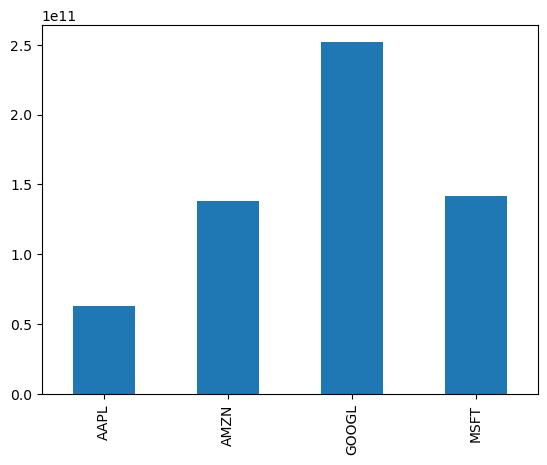

In [7]:
# Save to a variable for easier access
balance_sheet = companies.get_balance_sheet_statement()

# Show only the balance sheet statement for Amazon (purposely cut off to keep it compact)
display(balance_sheet.loc["AMZN"].head())

# Show the growth of the Accounts Receivable for each company
display(balance_sheet.loc[:, "Accounts Receivable", :])

# Plot the value of Total Shareholder Equity for each company in 2021
balance_sheet.loc[:, "Total Shareholder Equity", :]["2021"].plot(kind="bar")

For all of the financial statements, it is also possible to show the growth instead. E.g. if you are interested in revenue growth you can use the following:

In [8]:
companies.get_income_statement(growth=True)

date                                    2000    2001    2002    2003    2004  \
AAPL Revenue                             NaN -0.3282  0.0707  0.0810  0.3338   
     Cost of Goods Sold                  NaN -0.2904  0.0027  0.0870  0.3381   
     Gross Profit                        NaN -0.4298  0.2980  0.0655  0.3226   
     Gross Profit Ratio                  NaN -0.1511  0.2123 -0.0143 -0.0084   
     Research and Development Expenses   NaN  0.1605  0.0136  0.0537  0.0382   
...                                      ...     ...     ...     ...     ...   
MSFT Net Income Ratio                    NaN -0.2924 -0.0496  0.1250 -0.2860   
     EPS                                 NaN -0.2376  0.0507  0.2828 -0.1828   
     EPS Diluted                         NaN -0.2235  0.0682  0.3050 -0.1848   
     Weighted Average Shares             NaN  0.0293  0.0122 -0.0082  0.0075   
     Weighted Average Shares Diluted     NaN  0.0069 -0.0038 -0.0202  0.0011   

date                                      2005    2006    2007    2008  \
AAPL Revenue                            0.6827  0.3865  0.2429  0.3530   
     Cost of Goods Sold                 0.6425  0.3872  0.1556  0.3458   
     Gross Profit                       0.7897  0.3846  0.4566  0.3668   
     Gross Profit Ratio                 0.0634 -0.0014  0.1722  0.0100   
     Research and Development Expenses  0.0920  0.3333  0.0983  0.4182   
...                                        ...     ...     ...     ...   
MSFT Net Income Ratio                   0.3893 -0.0763 -0.0330  0.0636   
     EPS                                0.4868  0.0708  0.1901  0.3194   
     EPS Diluted                        0.4933  0.0714  0.1833  0.3169   
     Weighted Average Shares            0.0033 -0.0370 -0.0667 -0.0425   
     Weighted Average Shares Diluted    0.0011 -0.0344 -0.0612 -0.0421   

date                                      2009  ...    2014    2015    2016  \
AAPL Revenue                            0.1249  ...  0.0695  0.2786 -0.0773   
     Cost of Goods Sold                 0.0967  ...  0.0530  0.2479 -0.0622   
     Gross Profit                       0.1790  ...  0.0969  0.3273 -0.1000   
     Gross Profit Ratio                 0.0481  ...  0.0258  0.0381 -0.0245   
     Research and Development Expenses  0.2020  ...  0.3499  0.3354  0.2452   
...                                        ...  ...     ...     ...     ...   
MSFT Net Income Ratio                  -0.1480  ... -0.0947 -0.4874  0.5111   
     EPS                               -0.1421  ...  0.0192 -0.4398  0.4228   
     EPS Diluted                       -0.1337  ...  0.0194 -0.4373  0.4189   
     Weighted Average Shares           -0.0411  ... -0.0091 -0.0147 -0.0308   
     Weighted Average Shares Diluted   -0.0501  ... -0.0084 -0.0173 -0.0292   

date                                      2017    2018    2019    2020  \
AAPL Revenue                            0.0630  0.1586 -0.0204  0.0551   
     Cost of Goods Sold                 0.0736  0.1610 -0.0121  0.0481   
     Gross Profit                       0.0466  0.1548 -0.0338  0.0667   
     Gross Profit Ratio                -0.0156 -0.0034 -0.0136  0.0108   
     Research and Development Expenses  0.1529  0.2293  0.1392  0.1563   
...                                        ...     ...     ...     ...   
MSFT Net Income Ratio                   0.1971 -0.3627  1.0759 -0.0071   
     EPS                                0.2925 -0.2153  1.3767  0.1389   
     EPS Diluted                        0.2905 -0.2140  1.3756  0.1383   
     Weighted Average Shares           -0.0226 -0.0059 -0.0035 -0.0082   
     Weighted Average Shares Diluted   -0.0226 -0.0049 -0.0053 -0.0090   

date                                      2021    2022    2023  
AAPL Revenue                            0.3326  0.0779  0.0000  
     Cost of Goods Sold                 0.2561  0.0496  0.0000  
     Gross Profit                       0.4562  0.1174  0.0000  
     Gross Profit Ratio                 0.0929  0.03

By default, the lag is set to 1 (one period) but it is possible to change this and add multiple lags as well.

In [9]:
companies.get_income_statement(growth=True, lag=[1, 2, 3])

date                                        2000    2001    2002    2003  \
AAPL Revenue                         Lag 1   NaN -0.3282  0.0707  0.0810   
                                     Lag 2   NaN     NaN -0.2807  0.1574   
                                     Lag 3   NaN     NaN     NaN -0.2225   
     Cost of Goods Sold              Lag 1   NaN -0.2904  0.0027  0.0870   
                                     Lag 2   NaN     NaN -0.2885  0.0899   
...                                          ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2   NaN     NaN  0.0418  0.0038   
                                     Lag 3   NaN     NaN     NaN  0.0332   
     Weighted Average Shares Diluted Lag 1   NaN  0.0069 -0.0038 -0.0202   
                                     Lag 2   NaN     NaN  0.0031 -0.0239   
                                     Lag 3   NaN     NaN     NaN -0.0172   

date                                          2004    2005    2006    2007  \
AAPL Revenue                         Lag 1  0.3338  0.6827  0.3865  0.2429   
                                     Lag 2  0.4418  1.2444  1.3330  0.7232   
                                     Lag 3  0.5437  1.4262  2.1118  1.8996   
     Cost of Goods Sold              Lag 1  0.3381  0.6425  0.3872  0.1556   
                                     Lag 2  0.4545  1.1978  1.2786  0.6032   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0008  0.0108 -0.0338 -0.1012   
                                     Lag 3  0.0113  0.0025 -0.0266 -0.0982   
     Weighted Average Shares Diluted Lag 1  0.0011  0.0011 -0.0344 -0.0612   
                                     Lag 2 -0.0191  0.0022 -0.0333 -0.0935   
                                     Lag 3 -0.0228 -0.0180 -0.0323 -0.0925   

date                                          2008    2009  ...    2014  \
AAPL Revenue                         Lag 1  0.3530  0.1249  ...  0.0695   
                                     Lag 2  0.6815  0.5220  ...  0.1680   
                                     Lag 3  1.3314  0.8916  ...  0.6887   
     Cost of Goods Sold              Lag 1  0.3458  0.0967  ...  0.0530   
                                     Lag 2  0.5553  0.4760  ...  0.2779   
...                                            ...     ...  ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.1063 -0.0818  ... -0.0116   
                                     Lag 3 -0.1394 -0.1430  ... -0.0225   
     Weighted Average Shares Diluted Lag 1 -0.0421 -0.0501  ... -0.0084   
                                     Lag 2 -0.1008 -0.0900  ... -0.0126   
                                     Lag 3 -0.1317 -0.1458  ... -0.0226   

date                                          2015    2016    2017    2018  \
AAPL Revenue                         Lag 1  0.2786 -0.0773  0.0630  0.1586   
                                     Lag 2  0.3675  0.1797 -0.0192  0.2317   
                                     Lag 3  0.4933  0.2617  0.2540  0.1364   
     Cost of Goods Sold              Lag 1  0.2479 -0.0622  0.0736  0.1610   
                                     Lag 2  0.3141  0.1703  0.0068  0.2465   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0236 -0.0451 -0.0527 -0.0284   
                                     Lag 3 -0.0261 -0.0537 -0.0666 -0.0583   
     Weighted Average Shares Diluted Lag 1 -0.0173 -0.0292 -0.0226 -0.0049   
                                     Lag 2 -0.0255 -0.0460 -0.0511 -0.0273   
                                     Lag 3 -0.0296 -0.0540 -0.0675 -0.0557   

date                                          2019    2020    2021    2022  \
AAPL Revenue                         Lag 1 -0.0204  0.0551  0.3326  0.0779   
                                     Lag 2  0.1350  0.0336  0.4060  0.4365   
                                     Lag 3  0.2065  0.1975  0.3773  0.5156   


There are several other functionalities within the `Toolkit` class which includes observing company profiles, company quotes, enterprise values and ratings. For example, after initialization you can call the functionality `get_profile`.

In [10]:
companies.get_profile()

,AAPL,MSFT,GOOGL,AMZN
symbol,AAPL,MSFT,GOOGL,AMZN
price,177.79,321.01,129.56,138.41
beta,1.286802,0.903706,1.061309,1.255975
volAvg,57302609,28396335,32538822,60293309
mktCap,2796405646961,2386866578130,1647135162252,1420141981716
lastDiv,0.96,2.72,0,0.2
range,124.17-198.23,213.43-366.78,83.34-133.74,81.43-146.57
changes,0.06,-1.92,-0.13,-0.15
companyName,Apple Inc.,Microsoft Corporation,Alphabet Inc.,"Amazon.com, Inc."
currency,USD,USD,USD,USD


# The Ratios Module

After initialization of `Toolkit`, you can get access to the Ratios module which includes over 50 different ratios. This can be done by calling the `ratios` property. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Ratios-Module) to find all the available ratios.

In [11]:
ratios = companies.ratios

Within this ratios module, the distinction is made between `collect_` and `get_`. The former obtains a collection of ratios (e.g. all solvency ratios) whereas the latter obtains a specific ratio.

In [12]:
ratios.collect_valuation_ratios()

2000          2001          2002  \
AAPL Earnings per Share (EPS)        3.900000e-02 -1.900000e-03  3.200000e-03   
     Revenue per Share (RPS)         3.956000e-01  2.771000e-01  2.834000e-01   
     Price-to-Earnings (PE)          5.781100e+00 -1.747053e+02  6.787530e+01   
     Earnings per Share Growth                NaN -1.048700e+00 -2.684200e+00   
     Price-to-Earnings-Growth (PEG)  1.482333e+02  9.195016e+04  2.121103e+04   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                      1.013240e+01  2.026610e+01  1.526170e+01   
     EV-to-EBITDA                    1.228160e+01  1.704640e+01  1.352230e+01   
     EV-to-Operating-Cash-Flow       1.036030e+01  1.683560e+01  1.211030e+01   
     Tangible Asset Value            4.136800e+10  4.728900e+10  5.218000e+10   
     Net Current Asset Value         2.055300e+10  2.850500e+10  3.583200e+10   

                                             2003          2004          2005  \
AAPL Earnings per Share (EPS)        3.400000e-03  1.270000e-02  5.560000e-02   
     Revenue per Share (RPS)         3.050000e-01  3.816000e-01  5.806000e-01   
     Price-to-Earnings (PE)          9.526680e+01  7.685950e+01  3.919580e+01   
     Earnings per Share Growth       6.250000e-02  2.735300e+00  3.378000e+00   
     Price-to-Earnings-Growth (PEG)  2.801965e+04  6.051929e+03  7.049604e+02   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                      1.226530e+01  1.544560e+01  1.189630e+01   
     EV-to-EBITDA                    1.232390e+01  1.843190e+01  1.283150e+01   
     EV-to-Operating-Cash-Flow       1.143370e+01  1.287940e+01  1.191270e+01   
     Tangible Asset Value            6.102000e+10  7.482500e+10  4.811500e+10   
     Net Current Asset Value         4.499900e+10  5.559700e+10  3.186000e+10   

                                             2006          2007          2008  \
AAPL Earnings per Share (EPS)        8.090000e-02  1.404000e-01  1.914000e-01   
     Revenue per Share (RPS)         7.861000e-01  9.641000e-01  1.285800e+00   
     Price-to-Earnings (PE)          3.179050e+01  4.276800e+01  1.351780e+01   
     Earnings per Share Growth       4.550000e-01  7.355000e-01  3.632000e-01   
     Price-to-Earnings-Growth (PEG)  3.929604e+02  3.046154e+02  7.062590e+01   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                      1.204560e+01  1.248940e+01  5.318800e+00   
     EV-to-EBITDA                    1.266050e+01  1.257510e+01  5.159700e+00   
     EV-to-Operating-Cash-Flow       1.527190e+01  1.410710e+01  5.860700e+00   
     Tangible Asset Value            3.623800e+10  2.633700e+10  2.417800e+10   
     Net Current Asset Value         2.656800e+10  1.641400e+10  1.335600e+10   

                                             2009  ...          2014  \
AAPL Earnings per Share (EPS)        2.246000e-01  ...  1.613300e+00   
     Revenue per Share (RPS)         1.438700e+00  ...  7.463900e+00   
     Price-to-Earnings (PE)          2.844210e+01  ...  1.533130e+01   
     Earnings per Share Growth       1.735000e-01  ...  1.363000e-01   
     Price-to-Earnings-Growth (PEG)  1.266345e+02  ...  9.503100e+00   
...                                           ...  ...           ...   
MSFT EV-to-EBIT                      1.051950e+01  ...  1.241820e+01   
     EV-to-EBITDA                    9.095200e+00  ...  1.070300e+01   
     EV-to-Operating-Cash-Flow       1.095270e+01  ...  1.094870e+01   
     Tangible Asset Value            2.705500e+10  ...  6.965700e+10   
     Net Current Asset Value         2.224600e+10  ...  6.862100e+10   

                                             2015          2016          2017  \
AAPL Earnings per Share (EPS)        2.304200e+00  2.076600e+00  2.301700e+00   
     Revenue per Share (RPS)         1.008600e+01  9.801300e+00  1.091240e+01   
     Price-to-Earn

In [13]:
ratios.get_effective_tax_rate()

date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,0.2802,0.2885,0.2529,0.2609,0.2794,0.2645,0.2942,0.3019,0.2989,0.2856,...,0.2613,0.2637,0.2556,0.2456,0.1834,0.1594,0.1443,0.1330,0.1620,NaN
AMZN,-0.7748,-0.7981,0.1397,0.5714,-0.6536,0.2220,0.4960,0.2788,0.2741,0.2179,...,-2.2568,0.6145,0.3754,0.2023,0.1062,0.1700,0.1183,0.1256,-0.5417,NaN
GOOGL,-0.0000,0.3062,0.4611,0.6952,0.3862,0.3158,0.2328,0.2591,0.2779,0.2220,...,0.1930,0.1681,0.1935,0.5344,0.1196,0.1333,0.1625,0.1620,0.1592,NaN
MSFT,0.3400,0.3301,0.3200,0.3214,0.3303,0.2631,0.3101,0.3003,0.2575,0.2650,...,0.2065,0.3412,0.1495,0.0840,0.5457,0.1018,0.1651,0.1383,0.1311,0.1898


Some of these ratios also include optional fields depending on whether there is room for different methods of calculation. E.g. whether you'd like to have the diluted average shares included in the calculation.

In [14]:
ratios.collect_solvency_ratios(diluted=False)

date                                    2000     2001     2002     2003  \
AAPL  Debt-to-Assets Ratio            0.0441   0.0526   0.0502   0.0446   
      Debt-to-Equity Ratio            0.0730   0.0809   0.0772   0.0720   
      Debt Service Coverage Ratio     0.4325  -0.2266   0.1013   0.0378   
      Equity Multiplier                  NaN   1.5976   1.5370   1.5765   
      Free Cash Flow Yield            0.1755  -0.0073  -0.0197   0.0191   
      Net-Debt to EBITDA Ratio       -0.9685   8.2355  -6.7692 -15.3069   
      Cash Flow Coverage Ratio        0.1755  -0.0073  -0.0197   0.0191   
      CAPEX Coverage Ratio           -7.7196  -0.7974  -0.5115  -1.7622   
      Dividend CAPEX Coverage Ratio  -7.7196  -0.7974  -0.5115  -1.7622   
AMZN  Debt-to-Assets Ratio            1.0042   1.3258   1.1508   0.9018   
      Debt-to-Equity Ratio           -2.2166  -1.5077  -1.6932  -1.8817   
      Debt Service Coverage Ratio    -0.8861  -0.4474   0.0602   0.2160   
      Equity Multiplier                  NaN  -1.5672  -1.2990  -1.7382   
      Free Cash Flow Yield           -0.0486  -0.0432   0.0189   0.0166   
      Net-Debt to EBITDA Ratio       -2.8878 -11.1309  10.2213   2.4287   
      Cash Flow Coverage Ratio       -0.0486  -0.0432   0.0189   0.0166   
      CAPEX Coverage Ratio            0.9680   2.3804  -4.4504  -8.5291   
      Dividend CAPEX Coverage Ratio   0.9680   2.3804  -4.4504  -8.5291   
GOOGL Debt-to-Assets Ratio            0.0000      NaN   0.0379   0.0076   
      Debt-to-Equity Ratio            0.0000      NaN   0.0624   0.0112   
      Debt Service Coverage Ratio       -inf      NaN   2.0832   1.4545   
      Equity Multiplier                  NaN      NaN      NaN   1.5187   
      Free Cash Flow Yield               NaN      NaN      NaN      NaN   
      Net-Debt to EBITDA Ratio       -0.0000      NaN  -0.2176  -0.3582   
      Cash Flow Coverage Ratio           NaN      NaN      NaN      NaN   
      CAPEX Coverage Ratio               NaN  -2.3846  -4.1740  -2.2367   
      Dividend CAPEX Coverage Ratio      NaN  -2.3846  -4.1740  -2.2367   
MSFT  Debt-to-Assets Ratio            0.0000   0.0000   0.0000   0.0000   
      Debt-to-Equity Ratio            0.0000   0.0000   0.0000   0.0000   
      Debt Service Coverage Ratio     1.1306   1.0528   0.9346   0.9458   
      Equity Multiplier                  NaN   1.2566   1.2758   1.3005   
      Free Cash Flow Yield            0.0934   0.0559   0.0790   0.0809   
      Net-Debt to EBITDA Ratio       -0.4115  -0.2959  -0.2321  -0.4393   
      Cash Flow Coverage Ratio        0.0934   0.0559   0.0790   0.0809   
      CAPEX Coverage Ratio          -15.8828 -12.1686 -18.8429 -17.7295   
      Dividend CAPEX Coverage Ratio -15.6513 -12.1686 -18.8429  -9.0372   

date                                    2004      2005     2006    2007  \
AAPL  Debt-to-Assets Ratio            0.0000    0.0000   0.0000  0.0000   
      Debt-to-Equity Ratio            0.0000    0.0000   0.0000  0.0000   
      Debt Service Coverage Ratio     0.1216    0.4736   0.3791  0.4741   
      Equity Multiplier               1.5986    1.5628   1.6479  1.7357   
      Free Cash Flow Yield            0.0373    0.0461   0.0257  0.0308   
      Net-Debt to EBITDA Ratio       -6.2374   -1.9087  -2.3869 -1.9788   
      Cash Flow Coverage Ratio        0.0373    0.0461   0.0257  0.0308   
      CAPEX Coverage Ratio           -5.3068   -9.7500  -3.3790 -5.5477   
      Dividend CAPEX Coverage Ratio  -5.3068   -9.7500  -3.3790 -5.5477   
AMZN  Debt-to-Assets Ratio            0.5719    0.4115   0.2904  0.2072   
      Debt-to-Equity Ratio           -8.1761    6.1829   2.9397  1.1228   
      Debt Service Coverage Ratio     0.2718    0.2240   0.1536  0.1764   
      Equity Multiplier              -4.2828  369.6050  11.9040  6.6634   
      Free Cash Flow Yield            0.0266    0.0272   0.0296  0.0309   
      Net-Debt to EBITDA Ratio        1.0755    0.9186   0.4125 -1.3263   
      Cash Flow Coverage

There is also an option to show all ratios if desired. Since each `collect` function depends on the `get` functions, these will always have the same result.

In [15]:
ratios.collect_all_ratios()

2000          2001  \
AAPL Days of Inventory Outstanding (DIO)                  NaN  1.945300e+00   
     Days of Sales Outstanding (DSO)                      NaN  4.828780e+01   
     Operating Cycle (CC)                                 NaN  5.023310e+01   
     Days of Accounts Payable Outstanding (DPO)           NaN  8.656370e+01   
     Cash Conversion Cycle (CCC)                          NaN -3.633070e+01   
...                                                       ...           ...   
MSFT EV-to-EBIT                                  1.013240e+01  2.026610e+01   
     EV-to-EBITDA                                1.228160e+01  1.704640e+01   
     EV-to-Operating-Cash-Flow                   1.036030e+01  1.683560e+01   
     Tangible Asset Value                        4.136800e+10  4.728900e+10   
     Net Current Asset Value                     2.055300e+10  2.850500e+10   

                                                         2002          2003  \
AAPL Days of Inventory Outstanding (DIO)         2.469200e+00  4.097000e+00   
     Days of Sales Outstanding (DSO)             3.276860e+01  4.454450e+01   
     Operating Cycle (CC)                        3.523780e+01  4.864150e+01   
     Days of Accounts Payable Outstanding (DPO)  7.548680e+01  8.376580e+01   
     Cash Conversion Cycle (CCC)                -4.024900e+01 -3.512430e+01   
...                                                       ...           ...   
MSFT EV-to-EBIT                                  1.526170e+01  1.226530e+01   
     EV-to-EBITDA                                1.352230e+01  1.232390e+01   
     EV-to-Operating-Cash-Flow                   1.211030e+01  1.143370e+01   
     Tangible Asset Value                        5.218000e+10  6.102000e+10   
     Net Current Asset Value                     3.583200e+10  4.499900e+10   

                                                         2004          2005  \
AAPL Days of Inventory Outstanding (DIO)         4.759600e+00  4.909500e+00   
     Days of Sales Outstanding (DSO)             4.408750e+01  3.094290e+01   
     Operating Cycle (CC)                        4.884700e+01  3.585230e+01   
     Days of Accounts Payable Outstanding (DPO)  7.897220e+01  5.961520e+01   
     Cash Conversion Cycle (CCC)                -3.012520e+01 -2.376280e+01   
...                                                       ...           ...   
MSFT EV-to-EBIT                                  1.544560e+01  1.189630e+01   
     EV-to-EBITDA                                1.843190e+01  1.283150e+01   
     EV-to-Operating-Cash-Flow                   1.287940e+01  1.191270e+01   
     Tangible Asset Value                        7.482500e+10  4.811500e+10   
     Net Current Asset Value                     5.559700e+10  3.186000e+10   

                                                         2006          2007  \
AAPL Days of Inventory Outstanding (DIO)         5.787500e+00  7.091800e+00   
     Days of Sales Outstanding (DSO)             3.927790e+01  5.225800e+01   
     Operating Cycle (CC)                        4.506540e+01  5.934980e+01   
     Days of Accounts Payable Outstanding (DPO)  6.877180e+01  9.624650e+01   
     Cash Conversion Cycle (CCC)                -2.370640e+01 -3.689670e+01   
...                                                       ...           ...   
MSFT EV-to-EBIT                                  1.204560e+01  1.248940e+01   
     EV-to-EBITDA                                1.266050e+01  1.257510e+01   
     EV-to-Operating-Cash-Flow                   1.527190e+01  1.410710e+01   
     Tangible Asset Value                        3.623800e+10  2.633700e+10   
     Net Current Asset Value                     2.656800e+10  1.641400e+10   

                                                         2008          2009  \
AAPL Days of Inventory Outstanding (DIO)         7.314000e+00  7.519300e+00   
     Days of Sales Outstanding (DSO)             3.624830e+01  2.888570e+01   
     Operating Cycle (CC

For all ratios, it is also possible to show the growth instead. E.g. if you are interested in the growth of the Price-to-Book ratio you can use the following:

In [16]:
ratios.get_price_to_book_ratio(growth=True)

Date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,NaN,0.4526,-0.3444,0.4525,1.6723,0.6788,-0.0961,0.6254,-0.6979,0.8756,...,0.4622,-0.1424,-0.0061,0.3562,0.1269,1.0803,1.3799,0.3417,-0.1130,0.0000
AMZN,NaN,-0.5154,0.9304,3.0329,2.8932,-1.9835,-0.5239,-0.1554,-0.7473,0.3643,...,-0.2984,0.8045,-0.2188,0.1057,-0.1712,-0.1298,0.1848,-0.3017,-0.5280,0.0000
GOOGL,NaN,NaN,NaN,NaN,NaN,-0.2840,-0.3493,0.1520,-0.6410,0.5901,...,0.6029,0.2840,-0.1102,0.2189,-0.1485,0.1225,0.1649,0.4420,-0.5412,0.0000
MSFT,NaN,0.3453,-0.2954,-0.1050,-0.1091,0.5422,0.3420,0.4630,-0.5434,0.3983,...,0.1122,0.3518,0.2426,0.3680,0.0521,0.2669,0.2218,0.2580,-0.3918,0.0763


By default, the lag is set to 1 (one period) but it is possible to change this and add multiple lags as well.

In [17]:
ratios.collect_all_ratios(growth=True, lag=[1, 2, 3])

2000    2001    2002    2003  \
AAPL Days of Inventory Outstanding (DIO) Lag 1   NaN     NaN  0.2693  0.6592   
                                         Lag 2   NaN     NaN     NaN  1.1061   
                                         Lag 3   NaN     NaN     NaN     NaN   
     Days of Sales Outstanding (DSO)     Lag 1   NaN     NaN -0.3214  0.3594   
                                         Lag 2   NaN     NaN     NaN -0.0775   
...                                              ...     ...     ...     ...   
MSFT Tangible Asset Value                Lag 2   NaN     NaN  0.2614  0.2904   
                                         Lag 3   NaN     NaN     NaN  0.4751   
     Net Current Asset Value             Lag 1   NaN  0.3869  0.2570  0.2558   
                                         Lag 2   NaN     NaN  0.7434  0.5786   
                                         Lag 3   NaN     NaN     NaN  1.1894   

                                                  2004    2005    2006  \
AAPL Days of Inventory Outstanding (DIO) Lag 1  0.1617  0.0315  0.1788   
                                         Lag 2  0.9276  0.1983  0.2160   
                                         Lag 3  1.4467  0.9883  0.4126   
     Days of Sales Outstanding (DSO)     Lag 1 -0.0103 -0.2981  0.2694   
                                         Lag 2  0.3454 -0.3053 -0.1091   
...                                                ...     ...     ...   
MSFT Tangible Asset Value                Lag 2  0.4340 -0.2115 -0.5157   
                                         Lag 3  0.5823 -0.0779 -0.4061   
     Net Current Asset Value             Lag 1  0.2355 -0.4269 -0.1661   
                                         Lag 2  0.5516 -0.2920 -0.5221   
                                         Lag 3  0.9504 -0.1109 -0.4096   

                                                  2007    2008    2009  ...  \
AAPL Days of Inventory Outstanding (DIO) Lag 1  0.2254  0.0313  0.0281  ...   
                                         Lag 2  0.4445  0.2638  0.0603  ...   
                                         Lag 3  0.4900  0.4898  0.2992  ...   
     Days of Sales Outstanding (DSO)     Lag 1  0.3305 -0.3064 -0.2031  ...   
                                         Lag 2  0.6889 -0.0771 -0.4472  ...   
...                                                ...     ...     ...  ...   
MSFT Tangible Asset Value                Lag 2 -0.4526 -0.3328  0.0273  ...   
                                         Lag 3 -0.6480 -0.4975 -0.2534  ...   
     Net Current Asset Value             Lag 1 -0.3822 -0.1863  0.6656  ...   
                                         Lag 2 -0.4848 -0.4973  0.3553  ...   
                                         Lag 3 -0.7048 -0.5808 -0.1627  ...   

                                                  2014    2015    2016  \
AAPL Days of Inventory Outstanding (DIO) Lag 1  0.4403 -0.0777  0.0713   
                                         Lag 2  0.9352  0.3284 -0.0119   
                                         Lag 3  0.2173  0.7848  0.4231   
     Days of Sales Outstanding (DSO)     Lag 1  0.1377 -0.0593  0.1230   
                                         Lag 2  0.3475  0.0702  0.0564   
...                                                ...     ...     ...   
MSFT Tangible Asset Value                Lag 2  0.3165 -0.0178 -0.2230   
                                         Lag 3  0.5653  0.1934 -0.1581   
     Net Current Asset Value             Lag 1  0.0714  0.0908  0.0728   
                                         Lag 2  0.3097  0.1687  0.1702   
                                         Lag 3  0.4871  0.4286  0.2538   

                                                  2017    2018    2019  \
AAPL Days of Inventory Outstanding (DIO) Lag 1  0.4523  0.0862 -0.0738   
                                         Lag 2  0.5560  0.5775  0.0060   
                                         Lag 3  0.4351  0.6900  0.4610   
     Days of Sales Outstanding (DSO)     Lag 1  0.0248  0.1247  

# The Models Module

After initialization of `Toolkit`, you can get access to the Models module which includes a variety of well-known models. This can be done by calling the `models` property. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Models-Module) to find all the available models.

In [18]:
models = companies.models

It is possible to perform an (extended) Dupont analysis for each company.

In [19]:
models.get_dupont_analysis()

date                         2000      2001      2002      2003      2004  \
AAPL  Net Profit Margin  0.098459 -0.006899  0.011320  0.011116  0.033337   
      Asset Turnover          NaN  0.836400  0.932219  0.946694  1.113892   
      Equity Multiplier       NaN  1.597608  1.536993  1.576461  1.598559   
      Return on Equity        NaN -0.009219  0.016220  0.016591  0.059361   
AMZN  Net Profit Margin -0.510964 -0.178308 -0.038122  0.006703  0.085022   
      Asset Turnover          NaN  1.655271  2.168104  2.535206  2.558385   
      Equity Multiplier       NaN -1.567230 -1.299047 -1.738225 -4.282802   
      Return on Equity        NaN  0.462564  0.107371 -0.029538 -0.931596   
GOOGL Net Profit Margin -0.768788  0.080821  0.226744  0.072069  0.125146   
      Asset Turnover          NaN       NaN       NaN  2.531073  1.524190   
      Equity Multiplier       NaN       NaN       NaN  1.518703  1.189601   
      Return on Equity        NaN       NaN       NaN  0.277028  0.226912   
MSFT  Net Profit Margin  0.410394  0.290402  0.276009  0.310467  0.221746   
      Asset Turnover          NaN  0.454119  0.447034  0.437273  0.428414   
      Equity Multiplier       NaN  1.256607  1.275805  1.300504  1.265854   
      Return on Equity        NaN  0.165717  0.157416  0.176555  0.120255   

date                           2005       2006      2007      2008      2009  \
AAPL  Net Profit Margin    0.095829   0.102977  0.145630  0.148835  0.156116   
      Asset Turnover       1.421458   1.343372  1.128314  1.000601  0.782184   
      Equity Multiplier    1.562829   1.647908  1.735683  1.825516  1.911977   
      Return on Equity     0.212885   0.227966  0.285202  0.271863  0.233474   
AMZN  Net Profit Margin    0.039223   0.017739  0.032086  0.033653  0.036803   
      Asset Turnover       2.445098   2.658146  2.735066  2.590175  2.215303   
      Equity Multiplier  369.604982  11.903988  6.663391  3.825019  2.790642   
      Return on Equity    35.446272   0.561300  0.584767  0.333419  0.227519   
GOOGL Net Profit Margin    0.238720   0.290190  0.253328  0.193932  0.275699   
      Asset Turnover       0.903715   0.737857  0.757558  0.763372  0.654557   
      Equity Multiplier    1.100190   1.086412  1.102685  1.121245  1.124858   
      Return on Equity     0.237349   0.232622  0.211617  0.165992  0.202993   
MSFT  Net Profit Margin    0.307982   0.284517  0.275126  0.292635  0.249311   
      Asset Turnover       0.487586   0.630744  0.770095  0.888765  0.775639   
      Equity Multiplier    1.327509   1.591630  1.864693  2.017779  1.986723   
      Return on Equity     0.199349   0.285630  0.395079  0.524791  0.384183   

date                     ...      2014      2015      2016      2017  \
AAPL  Net Profit Margin  ...  0.216144  0.228458  0.211868  0.210924   
      Asset Turnover     ...  0.833085  0.894915  0.704513  0.657769   
      Equity Multiplier  ...  1.866637  2.262077  2.472355  2.657322   
      Return on Equity   ...  0.336118  0.462482  0.369033  0.368675   
AMZN  Net Profit Margin  ... -0.002708  0.005570  0.017435  0.017052   
      Asset Turnover     ...  1.880081  1.784192  1.827217  1.656787   
      Equity Multiplier  ...  4.620686  4.971979  4.556185  4.568924   
      Return on Equity   ... -0.023527  0.049409  0.145153  0.129080   
GOOGL Net Profit Margin  ...  0.218845  0.218005  0.215770  0.114221   
      Asset Turnover     ...  0.545343  0.538339  0.573232  0.607771   
      Equity Multiplier  ...  1.261948  1.239126  1.214333  1.251267   
      Return on Equity   ...  0.150608  0.145425  0.150196  0.086863   
MSFT  Net Profit Margin  ...  0.254212  0.130295  0.196882  0.235731   
      Asset Turnover     ...  0.551645  0.536880  0.461293  0.413772   
      Equity Multiplier  ...  1.865814  2.052235  2.432384  3.011130   
      Return on Equity   ...  0.261652  0.143559  0.220910  0.293703   

date                         2018      2019      2020      2021      2022  \
AAPL  Net Profit Margin  0.

In [20]:
models.get_extended_dupont_analysis()

date                               2000      2001      2002      2003  \
AAPL  Interest Burden Ratio    0.765568  6.615385  1.931034  0.967391   
      Tax Burden Ratio         0.940191  0.107558  0.386905  0.775281   
      Operating Profit Margin  0.136791 -0.009696  0.015152  0.014822   
      Asset Turnover                NaN  0.836400  0.932219  0.946694   
      Equity Multiplier             NaN  1.597608  1.536993  1.576461   
      Return on Equity              NaN -0.009219  0.016220  0.016591   
AMZN  Interest Burden Ratio    0.780607  0.783123 -0.439917  7.575872   
      Tax Burden Ratio         1.633645  1.350502 -2.338173  0.130387   
      Operating Profit Margin -0.400682 -0.168595 -0.037062  0.006786   
      Asset Turnover                NaN  1.655271  2.168104  2.535206   
      Equity Multiplier             NaN -1.567230 -1.299047 -1.738225   
      Return on Equity              NaN  0.462564  0.107371 -0.029538   
GOOGL Interest Burden Ratio    1.003199  1.088995  1.008388  0.987913   
      Tax Burden Ratio         0.996811  0.637085  0.534446  0.308494   
      Operating Profit Margin -0.768788  0.116493  0.420732  0.236473   
      Asset Turnover                NaN       NaN       NaN  2.531073   
      Equity Multiplier             NaN       NaN       NaN  1.518703   
      Return on Equity              NaN       NaN       NaN  0.277028   
MSFT  Interest Burden Ratio    0.772609  1.016920  1.034483  0.897528   
      Tax Burden Ratio         0.854203  0.626792  0.657347  0.756072   
      Operating Profit Margin  0.621842  0.455606  0.405888  0.457514   
      Asset Turnover                NaN  0.454119  0.447034  0.437273   
      Equity Multiplier             NaN  1.256607  1.275805  1.300504   
      Return on Equity              NaN  0.165717  0.157416  0.176555   

date                               2004        2005       2006      2007  \
AAPL  Interest Burden Ratio    0.851175    0.909091   0.870476  0.880391   
      Tax Burden Ratio         0.846626    0.809091   0.810844  0.792924   
      Operating Profit Margin  0.046262    0.130285   0.145897  0.208615   
      Asset Turnover           1.113892    1.421458   1.343372  1.128314   
      Equity Multiplier        1.598559    1.562829   1.647908  1.735683   
      Return on Equity         0.059361    0.212885   0.227966  0.285202   
AMZN  Interest Burden Ratio    1.237601    1.009346   1.031830  0.992424   
      Tax Burden Ratio         1.336098    0.770833   0.488432  0.726718   
      Operating Profit Margin  0.051418    0.050412   0.035197  0.044489   
      Asset Turnover           2.558385    2.445098   2.658146  2.735066   
      Equity Multiplier       -4.282802  369.604982  11.903988  6.663391   
      Return on Equity        -0.931596   35.446272   0.561300  0.584767   
GOOGL Interest Burden Ratio    0.984556    0.941915   0.885056  0.896091   
      Tax Burden Ratio         0.623436    0.726423   0.866887  0.826788   
      Operating Profit Margin  0.203885    0.348889   0.378225  0.341930   
      Asset Turnover           1.524190    0.903715   0.737857  0.757558   
      Equity Multiplier        1.189601    1.100190   1.086412  1.102685   
      Return on Equity         0.226912    0.237349   0.232622  0.211617   
MSFT  Interest Burden Ratio    0.740735    0.875692   0.901982  0.921546   
      Tax Burden Ratio         0.904140    0.841563   0.764874  0.759285   
      Operating Profit Margin  0.331098    0.417915   0.412402  0.393197   
      Asset Turnover           0.428414    0.487586   0.630744  0.770095   
      Equity Multiplier        1.265854    1.327509   1.591630  1.864693   
      Return on Equity         0.120255    0.199349   0.285630  0.395079   

date                               2008      2009  ...      2014      2015  \
AAPL  Interest Burden Ratio    0.910080  0.959168  ...  0.981676  0.982280   
      Tax Burden Ratio         0.770359  0.744842  ...  0.752528  0.749600   
      Operating Profit Margin  0.212291

Showing the growth is possible with the `growth=True` parameter which also includes a lag parameter in which 1 is the default. It is also possible to define multiple lags. As an example:

In [21]:
models.get_dupont_analysis(growth=True)

date                     2000    2001    2002    2003     2004     2005  \
AAPL  Net Profit Margin   NaN -1.0701 -2.6408 -0.0180   1.9989   1.8745   
      Asset Turnover      NaN     NaN  0.1146  0.0155   0.1766   0.2761   
      Equity Multiplier   NaN     NaN -0.0379  0.0257   0.0140  -0.0224   
      Return on Equity    NaN     NaN -2.7594  0.0229   2.5780   2.5863   
AMZN  Net Profit Margin   NaN -0.6510 -0.7862 -1.1758  11.6844  -0.5387   
      Asset Turnover      NaN     NaN  0.3098  0.1693   0.0091  -0.0443   
      Equity Multiplier   NaN     NaN -0.1711  0.3381   1.4639 -87.2998   
      Return on Equity    NaN     NaN -0.7679 -1.2751  30.5389 -39.0490   
GOOGL Net Profit Margin   NaN -1.1051  1.8055 -0.6822   0.7365   0.9075   
      Asset Turnover      NaN     NaN     NaN     NaN  -0.3978  -0.4071   
      Equity Multiplier   NaN     NaN     NaN     NaN  -0.2167  -0.0752   
      Return on Equity    NaN     NaN     NaN     NaN  -0.1809   0.0460   
MSFT  Net Profit Margin   NaN -0.2924 -0.0496  0.1248  -0.2858   0.3889   
      Asset Turnover      NaN     NaN -0.0156 -0.0218  -0.0203   0.1381   
      Equity Multiplier   NaN     NaN  0.0153  0.0194  -0.0266   0.0487   
      Return on Equity    NaN     NaN -0.0501  0.1216  -0.3189   0.6577   

date                       2006    2007    2008    2009  ...    2014    2015  \
AAPL  Net Profit Margin  0.0746  0.4142  0.0220  0.0489  ... -0.0026  0.0570   
      Asset Turnover    -0.0549 -0.1601 -0.1132 -0.2183  ... -0.0664  0.0742   
      Equity Multiplier  0.0544  0.0533  0.0518  0.0474  ...  0.1781  0.2118   
      Return on Equity   0.0708  0.2511 -0.0468 -0.1412  ...  0.0970  0.3760   
AMZN  Net Profit Margin -0.5477  0.8088  0.0488  0.0936  ... -1.7359 -3.0566   
      Asset Turnover     0.0871  0.0289 -0.0530 -0.1447  ... -0.0819 -0.0510   
      Equity Multiplier -0.9678 -0.4402 -0.4260 -0.2704  ...  0.1399  0.0760   
      Return on Equity  -0.9842  0.0418 -0.4298 -0.3176  ... -1.7701 -3.1001   
GOOGL Net Profit Margin  0.2156 -0.1270 -0.2345  0.4216  ...  0.0133 -0.0038   
      Asset Turnover    -0.1835  0.0267  0.0077 -0.1425  ... -0.0669 -0.0128   
      Equity Multiplier -0.0125  0.0150  0.0168  0.0032  ... -0.0197 -0.0181   
      Return on Equity  -0.0199 -0.0903 -0.2156  0.2229  ... -0.0731 -0.0344   
MSFT  Net Profit Margin -0.0762 -0.0330  0.0636 -0.1480  ... -0.0948 -0.4875   
      Asset Turnover     0.2936  0.2209  0.1541 -0.1273  ... -0.0657 -0.0268   
      Equity Multiplier  0.1990  0.1716  0.0821 -0.0154  ...  0.0281  0.0999   
      Return on Equity   0.4328  0.3832  0.3283 -0.2679  ... -0.1305 -0.4513   

date                       2016    2017    2018    2019    2020    2021  \
AAPL  Net Profit Margin -0.0726 -0.0045  0.0627 -0.0525 -0.0153  0.2376   
      Asset Turnover    -0.2128 -0.0663  0.0898  0.0308  0.1218  0.3079   
      Equity Multiplier  0.0930  0.0748  0.1562  0.1598  0.1930  0.2362   
      Return on Equity  -0.2021 -0.0010  0.3389  0.1328  0.3178  1.0010   
AMZN  Net Profit Margin  2.1304 -0.0220  1.5365 -0.0449  0.3376  0.2853   
      Asset Turnover     0.0241 -0.0933 -0.0436 -0.0872 -0.0231 -0.1035   
      Equity Multiplier -0.0836  0.0028 -0.0971 -0.1096 -0.0430 -0.0890   
      Return on Equity   1.9378 -0.1107  1.1903 -0.2238  0.2505  0.0497   
GOOGL Net Profit Margin -0.0103 -0.4706  0.9668 -0.0555  0.0398  0.3377   
      Asset Turnover     0.0648  0.0603  0.0468  0.0002 -0.0367  0.2382   
      Equity Multiplier -0.0200  0.0304  0.0412  0.0301  0.0467  0.0193   
      Return on Equity   0.0328 -0.4217  1.1437 -0.0269  0.0483  0.6883   
MSFT  Net Profit Margin  0.5111  0.1973 -0.3630  1.0766 -0.0070  0.1773   
      Asset Turnover    -0.1408 -0.1030  0.0670  0.0452  0.0544  0.0879   
      Equity Multiplier  0.1852  0.2379  0.0704 -0.0855 -0.0960 -0.0843   
      Return on Equity   0.5388  0.3295 -0.2725  0.9849 -0.0535  0.1729   

date                       2022    2023  
AAPL  Net Profit Margin -0.0221  0.0000  
   

In [22]:
models.get_extended_dupont_analysis(growth=True, lag=[1, 2, 3])

date                              2000    2001    2002    2003    2004  \
AAPL Interest Burden Ratio Lag 1   NaN  7.6411 -0.7081 -0.4990 -0.1201   
                           Lag 2   NaN     NaN  1.5224 -0.8538 -0.5592   
                           Lag 3   NaN     NaN     NaN  0.2636 -0.8713   
     Tax Burden Ratio      Lag 1   NaN -0.8856  2.5972  1.0038  0.0920   
                           Lag 2   NaN     NaN -0.5885  6.2080  1.1882   
...                                ...     ...     ...     ...     ...   
MSFT Equity Multiplier     Lag 2   NaN     NaN     NaN  0.0349 -0.0078   
                           Lag 3   NaN     NaN     NaN     NaN  0.0074   
     Return on Equity      Lag 1   NaN     NaN -0.0501  0.1216 -0.3189   
                           Lag 2   NaN     NaN     NaN  0.0654 -0.2361   
                           Lag 3   NaN     NaN     NaN     NaN -0.2743   

date                                2005    2006    2007    2008    2009  ...  \
AAPL Interest Burden Ratio Lag 1  0.0680 -0.0425  0.0114  0.0337  0.0539  ...   
                           Lag 2 -0.0603  0.0227 -0.0316  0.0455  0.0895  ...   
                           Lag 3 -0.5292 -0.1002  0.0343  0.0011  0.1019  ...   
     Tax Burden Ratio      Lag 1 -0.0443  0.0022 -0.0221 -0.0285 -0.0331  ...   
                           Lag 2  0.0436 -0.0423 -0.0200 -0.0499 -0.0606  ...   
...                                  ...     ...     ...     ...     ...  ...   
MSFT Equity Multiplier     Lag 2  0.0208  0.2574  0.4047  0.2677  0.0654  ...   
                           Lag 3  0.0405  0.2239  0.4731  0.5200  0.2482  ...   
     Return on Equity      Lag 1  0.6577  0.4328  0.3832  0.3283 -0.2679  ...   
                           Lag 2  0.1291  1.3752  0.9818  0.8373 -0.0276  ...   
                           Lag 3  0.2664  0.6178  2.2853  1.6325  0.3450  ...   

date                                2014    2015    2016    2017    2018  \
AAPL Interest Burden Ratio Lag 1 -0.0246  0.0006  0.0379 -0.0611  0.0160   
                           Lag 2 -0.0090 -0.0240  0.0385 -0.0256 -0.0461   
                           Lag 3 -0.0063 -0.0084  0.0129 -0.0250 -0.0100   
     Tax Burden Ratio      Lag 1  0.0256 -0.0039 -0.0259  0.0794  0.0653   
                           Lag 2 -0.0039  0.0217 -0.0297  0.0515  0.1499   
...                                  ...     ...     ...     ...     ...   
MSFT Equity Multiplier     Lag 2  0.0015  0.1308  0.3037  0.4672  0.3251   
                           Lag 3 -0.0111  0.1016  0.3403  0.6138  0.5705   
     Return on Equity      Lag 1 -0.1305 -0.4513  0.5388  0.3295 -0.2725   
                           Lag 2 -0.0488 -0.5229 -0.1557  1.0459 -0.0328   
                           Lag 3 -0.4165 -0.4781 -0.2659  0.1225  0.4883   

date                                2019    2020    2021    2022    2023  
AAPL Interest Burden Ratio Lag 1  0.0000  0.0160  0.0097  0.0052  0.0000  
                           Lag 2  0.0160  0.0160  0.0258  0.0150  0.0052  
                           Lag 3 -0.0461  0.0322  0.0259  0.0311  0.0150  
     Tax Burden Ratio      Lag 1  0.0294  0.0020  0.0034 -0.0385  0.0000  
                           Lag 2  0.0966  0.0315  0.0054 -0.0352 -0.0385  
...                                  ...     ...     ...     ...     ...  
MSFT Equity Multiplier     Lag 2 -0.0212 -0.1733 -0.1722 -0.1502 -0.1459  
                           Lag 3  0.2117 -0.1151 -0.2430 -0.2317 -0.2179  
     Return on Equity      Lag 1  0.9849 -0.0535  0.1729  0.0015 -0.1766  
                           Lag 2  0.4440  0.8786  0.1101  0.1747 -0.1753  
                           Lag 3  0.9198  0.3667  1.2034  0.1118 -0.0328  

[72 rows x 24 columns]